In [43]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm
from scipy.optimize import brute
import math

In [44]:
# h = open('sessionsbysource.tsv', 'r')
# f = h.read()
# f = ''.join(f.split('\x00'))
# w = open('sessionsbysource.tsv', 'w')
# w.write(f)
# w.close()

<module 'math' (built-in)>

In [118]:
data = pd.read_csv('sessionsbysource.tsv', sep='\t', parse_dates=[1])

In [119]:
dims = list(set(dims))
dims

['dogpile.com',
 'duckduckgo.com',
 'trvl.deals',
 'bdcid=bookingbuddy',
 '10467--284840886.ame-cte.ampxchange.com',
 'goseek.com',
 'searchthis.com',
 'tripadvisor.com',
 '10567.ampxchange.com',
 'yandex',
 'mf.smartfares.com',
 'yandex.ru',
 'trc.taboola.com',
 'cas.ny.us.criteo.com',
 'mg.mail.yahoo.com',
 'jetupfront.com',
 'secretflying.com',
 'vandrouki.ru',
 'cse.google.com',
 'displaycid=facebook',
 'mrrebates.com',
 'webmailb.juno.com',
 'travelfree.info',
 'outlook.live.com',
 'webshop-reviews.com',
 'golastminute.com',
 '(not set)',
 '10888--284840886.ame-cte.ampxchange.com',
 'baidu',
 'bs.serving-sys.com',
 'so.com',
 'expedia.com',
 'coupons.com',
 '(direct)',
 'analytics.trustyou.com',
 '100500miles.ru',
 'travelocity.ca',
 'promotot.com',
 'facebook',
 'a.intentmedia.net',
 'apideeplink.com',
 'rtbtracking.com',
 'vandrouki.by',
 'savings.com',
 'cat.ny.us.criteo.com',
 'orbitz.com',
 '11348-106437.ampxchange.com',
 'eureka.expedia.com',
 'centurylink.net',
 'classroom.

In [120]:
data = data.groupby(['ga:source', 'ga:date']).sum()

In [121]:
sess = data['ga:sessions']

In [163]:
# data['ga:sessions']
for dim in dims:
    l = len(sess[dim])
    if l < 82:
        continue
    vl = l // 5
    
    d = dim
    
    start = sess[dim][-vl:].index[0].strftime('%Y-%m-%d')
    
    print start
    
    model = auto_arima(sess[dim][:l-vl])
    pred = model.get_prediction(start=start, end=l-1)
    print pred.predicted_mean
    break

In [167]:
model.get_prediction(start='2017-02-05', end=l-1, dynamic=True)

ValueError: Start must be in dates. Got 2017-02-05 | 2017-02-05 00:00:00

In [166]:
sess[d]['2017-02-05']

333

In [86]:
direct = data.ix['(direct)']['ga:sessions']
len(direct)

82

In [147]:
t = direct[-16:].index[0].strftime('%Y-%m-%d')
t

'2017-02-05'

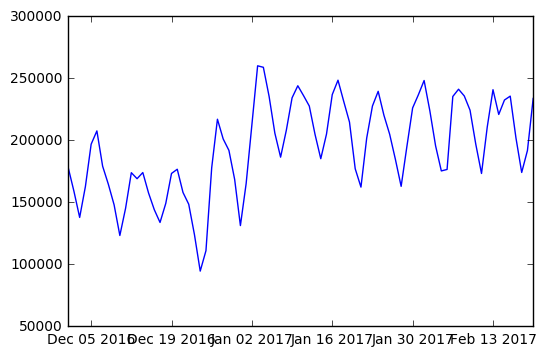

In [50]:
plt.plot(direct)

In [45]:
def test_arima(orders, x):
    order = orders[:3]
    seasonal_order = orders[3:]
    seasonal_order = np.insert(seasonal_order, 3, 7)
    try:
        fit = sm.tsa.statespace.SARIMAX(x, trend='n', order=order, seasonal_order=seasonal_order).fit()
        if math.isnan(rmse(fit.resid)):
            return float('inf')
        return rmse(fit.resid)
    except Exception as err:
        print err
        return float('inf')
        
def rmse(resid):
    rmse = 0
    for r in resid:
        rmse += math.sqrt(r**2)
        
    return rmse

def auto_arima(x):
        grid = (slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1))
        res = brute(test_arima, grid, args=(x,), finish=None)
        if any(i != 0 for i in res):
            # slice up orders
            order = res[:3].astype(int)
            seasonal_order = res[3:].astype(int)
            # hardcode insert seven period seasonality
            # this will need to become more dynamic later when we deal with
            # multi day long periods
            seasonal_order = np.insert(seasonal_order, 3, 7)
            return sm.tsa.statespace.SARIMAX(x.astype(float), trend='n', order=order, seasonal_order=seasonal_order).fit()

In [89]:
model = auto_arima(direct[:60])

Number of states in statespace model must be a positive number.
Number of states in statespace model must be a positive number.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
could not broadcast input array from shape (0,0) into shape (7,7)
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
could not broadcast input array from shape (0,0) into shape (14,14)
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Singular matrix
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
could not broadcast input array from shape (0,0) into shape (2,2)
could not broadcast input array from shape (0,0) into shape (9,9)
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
could not broadcast input array from shape (0,0) into shape (16,16)


/usr/local/lib/python2.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:924: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:]**2).mean()
/home/ubuntu/.local/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enfo

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enfor

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found w

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_station

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found w

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Singular matrix
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to 

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
non-invertible starting seasonal moving average parameters found with `enforce_invertibility` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-statio

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:475: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.
Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.


In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                       ga:sessions   No. Observations:                   60
Model:             SARIMAX(1, 0, 1)x(2, 0, 2, 7)   Log Likelihood                -665.240
Date:                           Thu, 23 Feb 2017   AIC                           1344.480
Time:                                   14:46:31   BIC                           1359.141
Sample:                               12-01-2016   HQIC                          1350.215
                                    - 01-29-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9304      0.178      5.214      0.000       0.581       1.280
ma.L1          0.3779      0.336      1.126      0.260      -0.280       1.036
ar.S.L7        0.4934      4.004      0.123      0.902      -7.354       8.341
ar.S.L14       0.4403      3.657      0.120      0.904      -6.727       7.608
ma.S.L7       -0.0745      4.210     -0.018      0.986      -8.325       8.176
ma.S.L14      -0.4150      2.134     -0.194      0.846      -4.598       3.768
sigma2      3.849e+08   9.66e-08   3.99e+15      0.000    3.85e+08    3.85e+08
===================================================================================
Ljung-Box (Q):                       42.33   Jarque-Bera (JB):                 9.34
Prob(Q):                              0.37   Prob(JB):                         0.01
Heteroskedasticity (H):               0.41   Skew:                             0.87
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.8e+31. Standard errors may be unstable.
"""

In [103]:
pred = model.get_prediction(start='2017-01-19', end=81)

82

In [104]:
pred.predicted_mean

2017-01-19    217130.628371
2017-01-20    192347.831083
2017-01-21    150318.195926
2017-01-22    184822.338315
2017-01-23    235931.930411
2017-01-24    238334.185918
2017-01-25    226456.433877
2017-01-26    202170.826892
2017-01-27    177611.086404
2017-01-28    168979.920560
2017-01-29    185016.807355
2017-01-30    223731.522659
2017-01-31    233940.175949
2017-02-01    219035.190050
2017-02-02    205317.244974
2017-02-03    184101.053861
2017-02-04    163457.584236
2017-02-05    186350.662176
2017-02-06    212228.958380
2017-02-07    223122.922842
2017-02-08    209467.810606
2017-02-09    195443.560232
2017-02-10    172391.748912
2017-02-11    153995.623964
2017-02-12    176077.656625
2017-02-13    200005.012991
2017-02-14    210098.580512
2017-02-15    197006.849516
2017-02-16    184241.168250
2017-02-17    163706.464184
2017-02-18    145708.401626
2017-02-19    166839.215133
2017-02-20    190184.030050
Freq: D, dtype: float64

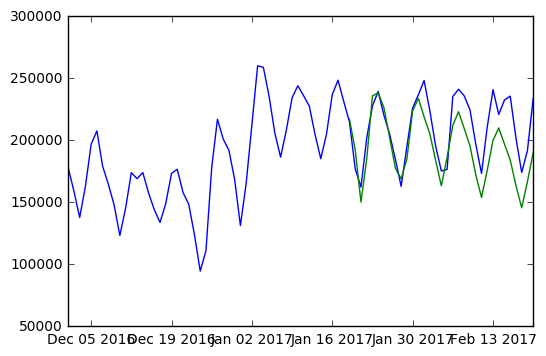

In [105]:
plt.plot(direct)
plt.plot(pred.predicted_mean)

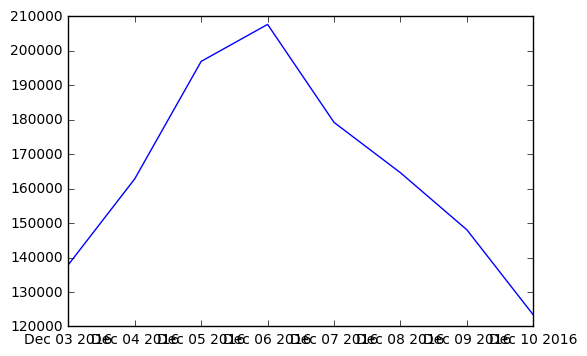

In [135]:
plt.plot(direct[2:10])

In [111]:
rmse(pred.predicted_mean-direct[-33:])

624606.190115843

In [114]:
def test(file):
    data = pd.read_csv(file, sep='\t', parse_dates=[1])

    dims = list(set(data['ga:source']))

    data = data.groupby(['ga:source', 'ga:date']).sum()
    sess = data['ga:sessions']

    sum_rmse = 0

    for dim in dims:
        l = len(sess[dim])
        vl = l // 5

        model = auto_arima(sess[dim][:l-vl])
        pred = model.get_prediction(start='2017-01-19', end=l-1)
        resid = pred.predicted_mean - sess[dim][-vl:]

        sum_rmse += rmse(resid)

    return sum_rmse

def test_arima(orders, x):
    order = orders[:3]
    seasonal_order = orders[3:]
    seasonal_order = np.insert(seasonal_order, 3, 7)
    try:
        fit = sm.tsa.statespace.SARIMAX(x, trend='n', order=order, seasonal_order=seasonal_order).fit()
        if math.isnan(rmse(fit.resid)):
            return float('inf')
        return rmse(fit.resid)
    except Exception as err:
        print err
        return float('inf')

def rmse(resid):
    rmse = 0
    for r in resid:
        rmse += math.sqrt(r**2)

    return rmse

def auto_arima(x):
        grid = (slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1), slice(0, 3, 1))
        res = brute(test_arima, grid, args=(x,), finish=None)
        if any(i != 0 for i in res):
            # slice up orders
            order = res[:3].astype(int)
            seasonal_order = res[3:].astype(int)
            # hardcode insert seven period seasonality
            # this will need to become more dynamic later when we deal with
            # multi day long periods
            seasonal_order = np.insert(seasonal_order, 3, 7)
            return sm.tsa.statespace.SARIMAX(x.astype(float), trend='n', order=order, seasonal_order=seasonal_order).fit()


In [115]:
test('./sessionsbysource.tsv')

Number of states in statespace model must be a positive number.
Number of states in statespace model must be a positive number.
maxlag should be < nobs
maxlag should be < nobs
could not broadcast input array from shape (0,0) into shape (7,7)
maxlag should be < nobs
maxlag should be < nobs
could not broadcast input array from shape (0,0) into shape (14,14)
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
maxlag should be < nobs
non-invertible starting MA parameters found with `enforce_invertibility` set to True.
non-invertible starting MA parameters found with `enforce_invertibility` set

ValueError: Start must be in dates. Got 2017-01-19 | 2017-01-19 00:00:00